In [1]:
import pandas as pd

In [2]:
hurricane_dataset = pd.read_csv('Hurricane Data Emergency Map - Sheet1 (1).csv')

In [3]:
def mean(*numbers):
    amount = len(numbers)
    total = sum(numbers)
    mean_num = total/amount
    return mean_num

In [7]:
hurr_category_dict = {}
hurr_occurrence_dict = {}
state_category = hurricane_dataset[['Code', 'Saffir-Simpson Category']]
# Fill in hurricane category dictionary, if repeat is found, find the average and add the average category
for index, row in state_category.iterrows():
    if row['Code'] in hurr_category_dict:
#       EXISTS
        mean_num = mean(hurr_category_dict[row['Code']], row['Saffir-Simpson Category'])
        hurr_occurrence_dict[row['Code']] += 1
        hurr_category_dict[row['Code']] = mean_num
    else:
#       DOES NOT EXIST
        hurr_category_dict[row['Code']] = row['Saffir-Simpson Category']
        hurr_occurrence_dict[row['Code']] = 1
df = pd.DataFrame(hurr_category_dict.items(), columns=['Code', 'Category'])
occurrence_df = pd.DataFrame(hurr_occurrence_dict.items(), columns=['Code', 'Occurrence'])

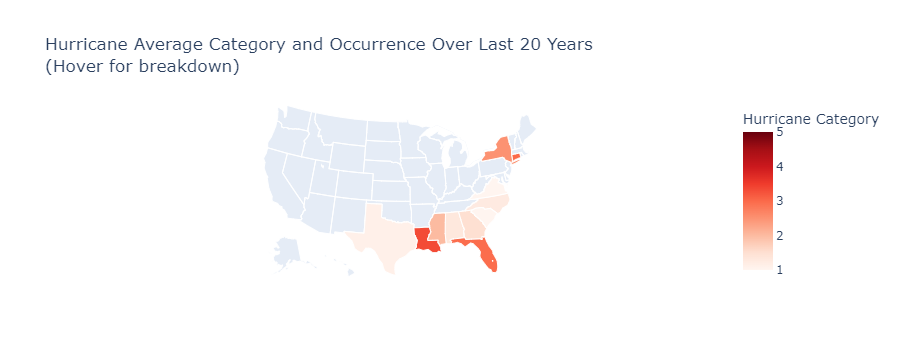

In [11]:
import plotly.graph_objects as go

for col in df.columns:
    df[col] = df[col].astype(str)
for col in occurrence_df.columns:
    occurrence_df[col] = occurrence_df[col].astype(str)

df['text'] = 'State: ' + df['Code'] + '<br>' + \
    'Occurrence: ' + occurrence_df['Occurrence']

fig = go.Figure(data=go.Choropleth(
    locations=df['Code'],
    z=df['Category'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Hurricane Category",
    zmax=5,
    zmin=1
))

fig.update_layout(
    title_text='Hurricane Average Category and Occurrence Over Last 20 Years<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()